<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imporando-Pacotes" data-toc-modified-id="Imporando-Pacotes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imporando Pacotes</a></span></li><li><span><a href="#Função-de-Entrada" data-toc-modified-id="Função-de-Entrada-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Função de Entrada</a></span></li><li><span><a href="#Dicionários" data-toc-modified-id="Dicionários-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dicionários</a></span></li><li><span><a href="#Cenários" data-toc-modified-id="Cenários-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cenários</a></span></li><li><span><a href="#Otimização" data-toc-modified-id="Otimização-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimização</a></span></li></ul></div>

# Imporando Pacotes

In [14]:
# Importando as bibliotecas
import numpy as np # pacote para funções matemáticas
import pandas as pd # pacote para a manipulação dos dados em tabela
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt # pacote para fazer gráficos
import matplotlib.patches as mpatches
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


import pandas_ta as ta
import talib
import mplfinance as mpf

import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

pd.set_option("display.max_columns", 40)
pd.set_option('display.max_rows', 500)

In [15]:
from futures_backtester import Backtester

# Função de Entrada

In [16]:
import importlib
name_strategy = 'pattern_rsi_trend'  # Nome da função/classe no módulo entries
module = importlib.import_module('entries')
entrada = getattr(module, name_strategy)

# Dicionários

In [17]:
from config.dicts_params import dict_custos, dict_valor_lot, dict_path

# Cenários

In [18]:
# win 5 min
{'sl': 300, 'tp': 620, 'LENGTH_RSI': 13, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 350, 'tp': 500, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 400, 'tp': 570, 'LENGTH_RSI': 10, 'RSI_LOW': 22, 'RSI_HIGH': 76}
{'sl': 400, 'tp': 650, 'LENGTH_RSI': 14, 'RSI_LOW': 30, 'RSI_HIGH': 70}

# win 2 min
{'sl': 320, 'tp': 400, 'LENGTH_RSI': 16, 'RSI_LOW': 30, 'RSI_HIGH': 70}
{'sl': 320, 'tp': 1400, 'LENGTH_RSI': 16, 'RSI_LOW': 30, 'RSI_HIGH': 70}

# wdo 5 min
{'sl': 4, 'tp': 30, 'LENGTH_RSI': 11, 'RSI_LOW': 60, 'RSI_HIGH': 65}
{'sl': 12, 'tp': 28, 'LENGTH_RSI': 9, 'RSI_LOW': 37, 'RSI_HIGH': 80}
{'sl': 12, 'tp': 24, 'LENGTH_RSI': 10, 'RSI_LOW': 25, 'RSI_HIGH': 80}

# USDJPY 5 min
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}

In [19]:
params = {'sl': 800, 'tp': 200, 'LENGTH_RSI': 9, 'RSI_LOW': 28, 'RSI_HIGH': 72}
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}
params = {'sl': 0.05000, 'tp': 0.15000, 'LENGTH_RSI': 9, 'RSI_LOW': 40, 'RSI_HIGH': 60}
#params = {'sl': 15, 'tp': 35, 'LENGTH_RSI': 10, 'RSI_LOW': 35, 'RSI_HIGH': 65}
params = {'sl': 10, 'tp': 15, 'LENGTH_RSI': 9, 'RSI_LOW': 30, 'RSI_HIGH': 70}

In [20]:
# Configurar o backtester
sym = 'WIN@N'
sym = 'WSP@N'
#sym = 'WDO@N'
#sym = 'EURJPY'
#sym = 'GBPJPY'
#sym = 'USDJPY'



bt = Backtester(
    symbol = sym,
    timeframe = 't5',
    data_ini = '2019-06-25',
    data_fim = '2025-06-30',
    tp = params['tp'],
    sl = params['sl'],
    slippage = 0,
    tc = dict_custos[sym], # $ per lot
    lote = 1,
    valor_lote= dict_valor_lot[sym],
    initial_cash = 30000,
    path_base= dict_path[sym],
    daytrade = True
)


# Parâmetros da estratégia RSI
LENGTH_RSI = params['LENGTH_RSI']
RSI_LOW = params['RSI_LOW']
RSI_HIGH = params['RSI_HIGH']

# Executa o backtest com a estratégia RSI
results, metrics = bt.run(
    signal_function=entrada, 
    signal_args={
        "length_rsi": LENGTH_RSI,
        "rsi_low": RSI_LOW,
        "rsi_high": RSI_HIGH,
        'allowed_hours': [9,10,11,12,13,16,17],
        #'allowed_hours': [6],
        'position_type': "both"
    }
)


# Print de métricas
bt.print_metrics(metrics)

RELATÓRIO DE DESEMPENHO
Símbolo: WSP@N
Timeframe: t5
Período: 2019-06-25 a 2025-06-30

--- RESULTADOS ---
Saldo Inicial: $30000.00
Saldo Final: $15656.25
Retorno Total: $-14343.75 (-47.81%)
Retorno Anualizado: -8.25%
Volatilidade Anualizada: 14.78%

--- DRAWDOWN ---
Drawdown Máximo: 50.51%
Drawdown Máximo (Valor): $15976.50
Tempo Máximo em Drawdown: 100628.0 períodos
Tempo em Drawdown: 99.80% do total

--- TRADES ---
Total de Trades: 9050
Trades Vencedores: 3877 (42.84%)
Trades Perdedores: 5173 (57.16%)
Saídas por TP: 33.51%
Saídas por SL: 48.76%
Saídas por Tempo: 17.72%

--- RATIOS ---
Sharpe Ratio: -0.558
Sortino Ratio: -1.150
Calmar Ratio: -0.163
Profit Factor: 0.937

--- ANÁLISE DE GANHOS/PERDAS ---
Ganho Médio: $55.44
Perda Média: $44.32
Win/Loss Ratio: 1.25
Expectancy: $-1.58


<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x1000 with 0 Axes>

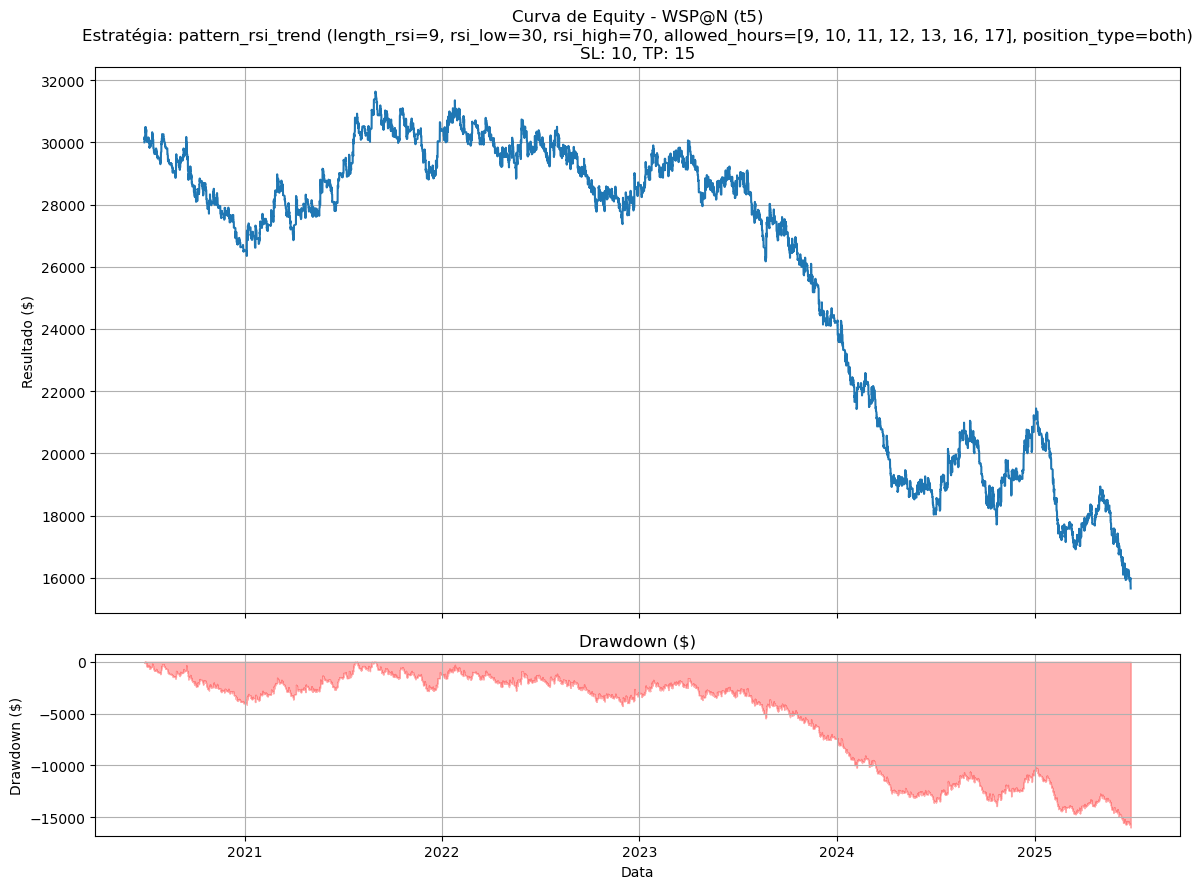

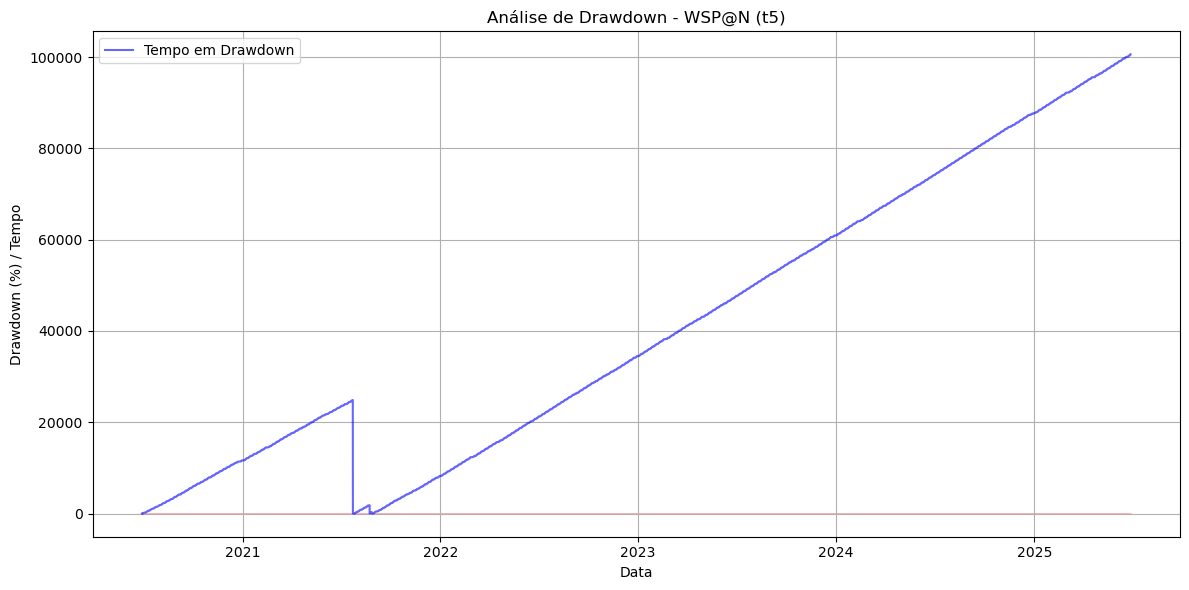

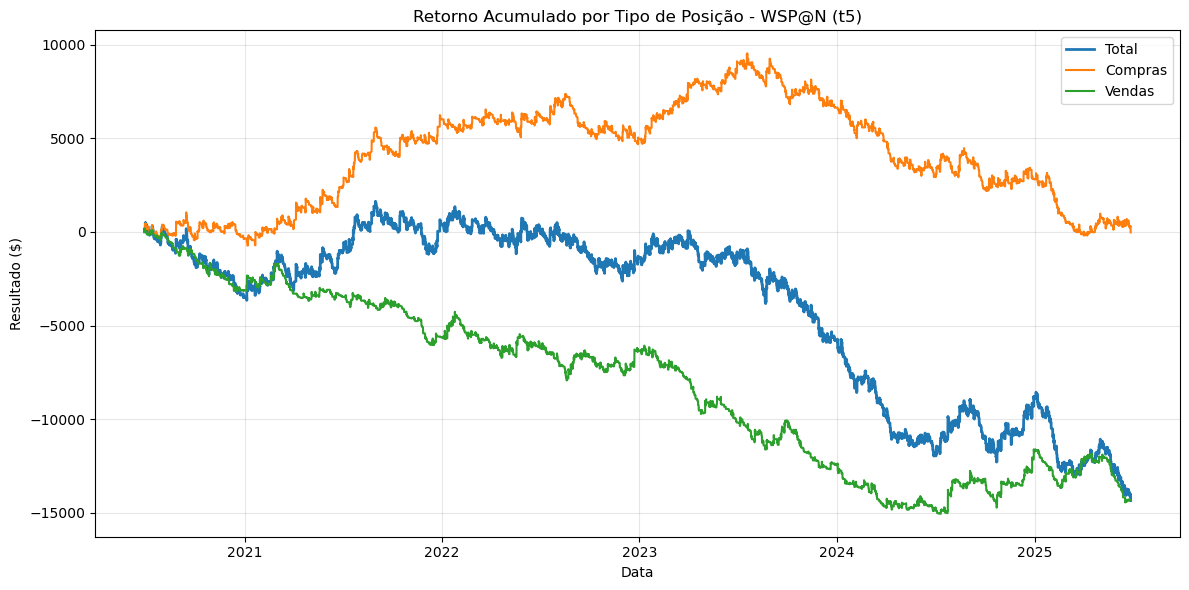

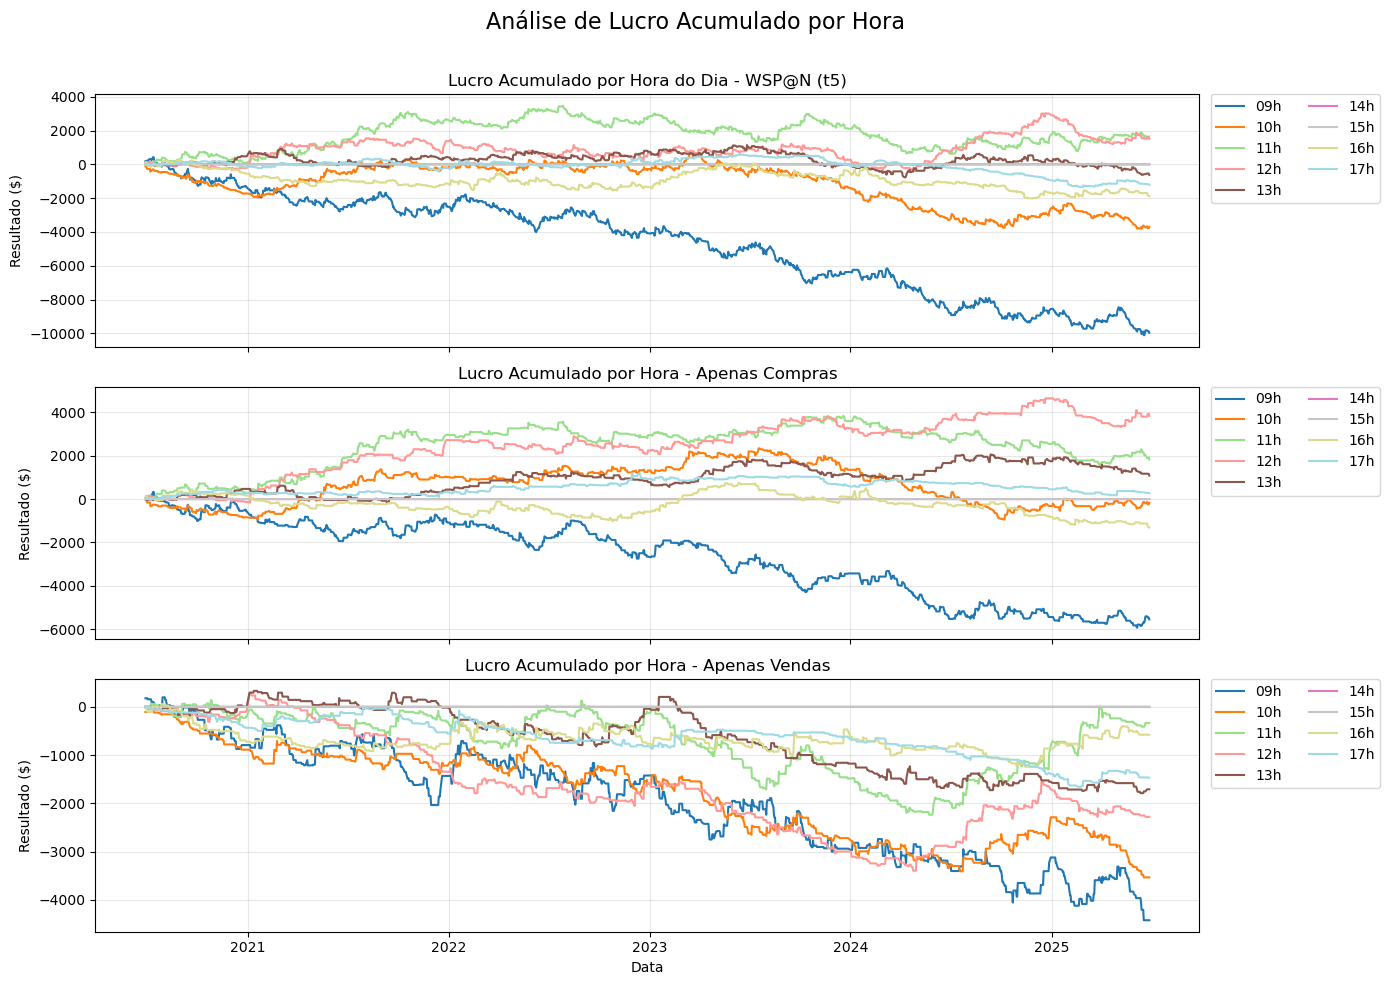

In [21]:
# Plotar a curva de equity com drawdown
plt.figure(figsize=(14, 10))

# 1. Curva de equity
plt = bt.plot_equity_curve(include_drawdown=True)

# 2. Análise detalhada de drawdown
plt = bt.plot_drawdown()

# 3. resultado por hora
bt.plot_by_position()
bt.plot_cumulative_by_hour()

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

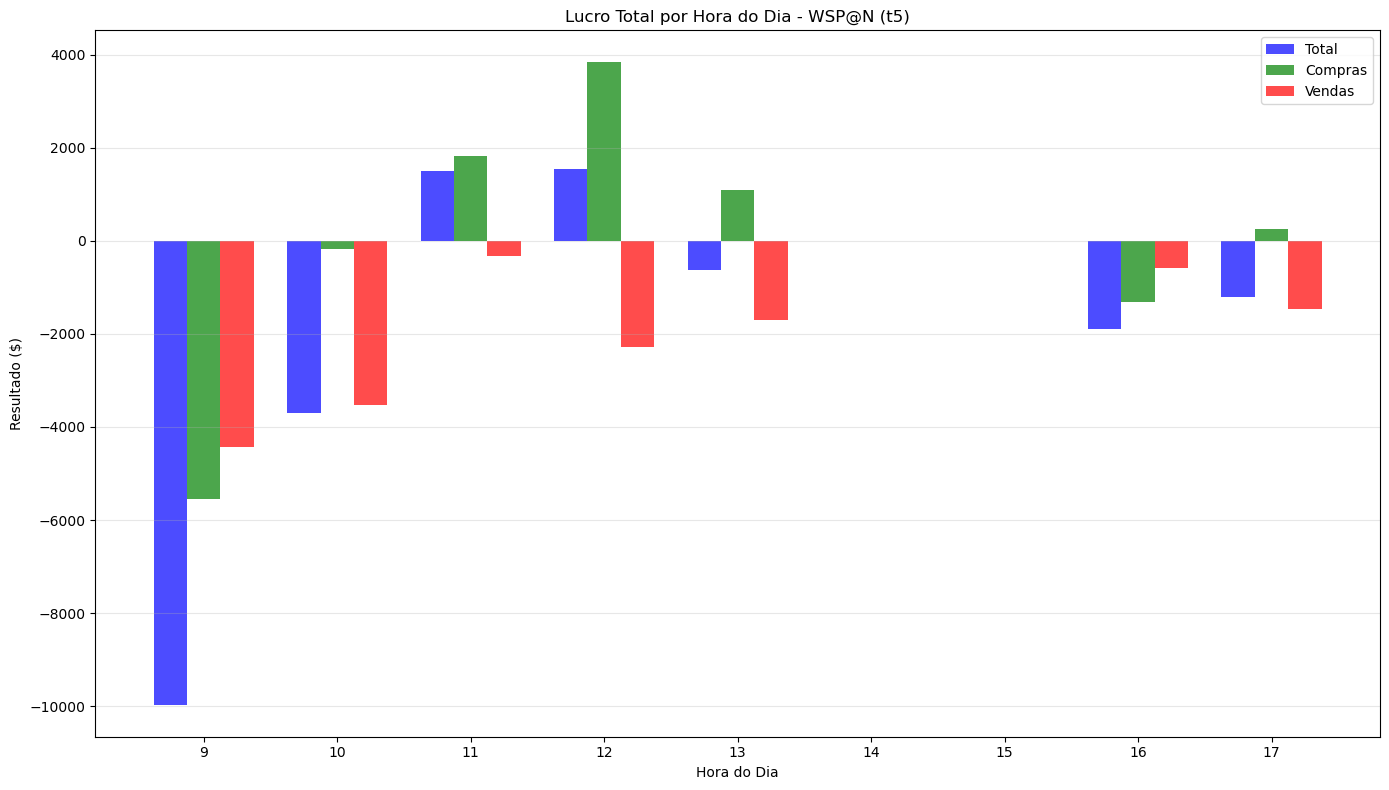

In [22]:
bt.plot_profit_by_hour()

# Otimização

In [9]:
metrics

{'initial_cash': 30000,
 'final_equity': 148663.0,
 'total_return': 118663.0,
 'total_return_pct': 395.54333333333335,
 'annual_return': 31.44768159985931,
 'annual_volatility': 19.604626512650096,
 'total_trades': 4524,
 'win_trades': 1342,
 'loss_trades': 3181,
 'win_rate': 0.29664014146772766,
 'tp_rate': 0.1275419982316534,
 'sl_rate': 0.6821396993810787,
 'time_exit_rate': 0.1903183023872679,
 'profit_factor': 1.3223793417281335,
 'max_drawdown': 0.5930061091215505,
 'max_drawdown_value': 8000.0,
 'max_time_underwater': 14470.0,
 'underwater_rate': 0.9632069316790093,
 'sharpe_ratio': 1.6040949099217656,
 'sortino_ratio': 6.519152395982275,
 'calmar_ratio': 0.5303095721297767,
 'avg_win': 362.70342771982115,
 'avg_loss': 115.71361207167557,
 'win_loss_ratio': 3.13449231448375,
 'expectancy': 26.204086292645513,
 'risk_free_rate': 0.0}

In [187]:
def objective_ind(trial):  
    
    '''
    função para maximizar os ganhos no mini-indice
    '''

    # Configurar o backtester
    sym = 'WDO@N'
    
    bt = Backtester(
        symbol = sym,
        timeframe = 't5',
        data_ini = '2019-01-01',
        data_fim = '2025-12-31',
        sl = trial.suggest_int('sl', 100, 2800),
        tp = trial.suggest_int('tp', 100, 2800),
        slippage = 0,
        tc = dict_custos[sym], # $ per lot
        lote = 1,
        valor_lote= dict_valor_lot[sym],
        initial_cash = 30000,
        path_base= dict_path[sym],
        daytrade = True
    )
    
    # Parâmetros da estratégia RSI
    LENGTH_RSI = trial.suggest_int('LENGTH_RSI', 4, 16)
    RSI_LOW = trial.suggest_int('RSI_LOW', 20, 50)
    RSI_HIGH = trial.suggest_int('RSI_HIGH', 50, 80)
    
    # Executa o backtest com a estratégia RSI
    _, metrics = bt.run(
        signal_function=entrada, 
        signal_args={
            "length_rsi": LENGTH_RSI,
            "rsi_low": RSI_LOW,
            "rsi_high": RSI_HIGH,
            'allowed_hours': [10,11,12,13,14,15,16]
        }
    )

    
    metrica = metrics['sharpe_ratio']
    #metrica = metrics['max_drawdown_value']
        
    return metrica

In [188]:
study = optuna.create_study(direction="maximize")

study.optimize(objective_ind, n_trials=220)

[I 2025-06-20 20:50:38,823] A new study created in memory with name: no-name-e24da7d1-f3dc-40c3-bce1-8eab3714c6f8
[I 2025-06-20 20:50:39,731] Trial 0 finished with value: 0.835876192066615 and parameters: {'sl': 2525, 'tp': 1232, 'LENGTH_RSI': 9, 'RSI_LOW': 32, 'RSI_HIGH': 70}. Best is trial 0 with value: 0.835876192066615.
[I 2025-06-20 20:50:40,659] Trial 1 finished with value: 0.8765401652956524 and parameters: {'sl': 1450, 'tp': 1879, 'LENGTH_RSI': 7, 'RSI_LOW': 28, 'RSI_HIGH': 61}. Best is trial 1 with value: 0.8765401652956524.
[I 2025-06-20 20:50:41,565] Trial 2 finished with value: -0.04603021028167927 and parameters: {'sl': 258, 'tp': 287, 'LENGTH_RSI': 10, 'RSI_LOW': 48, 'RSI_HIGH': 69}. Best is trial 1 with value: 0.8765401652956524.
[I 2025-06-20 20:50:42,498] Trial 3 finished with value: 1.4366376930542066 and parameters: {'sl': 2174, 'tp': 2169, 'LENGTH_RSI': 15, 'RSI_LOW': 45, 'RSI_HIGH': 50}. Best is trial 3 with value: 1.4366376930542066.
[I 2025-06-20 20:50:43,407] Tr

[I 2025-06-20 20:51:13,158] Trial 36 finished with value: 0.8764055078720964 and parameters: {'sl': 375, 'tp': 598, 'LENGTH_RSI': 14, 'RSI_LOW': 24, 'RSI_HIGH': 61}. Best is trial 24 with value: 1.6901388898829872.
[I 2025-06-20 20:51:14,069] Trial 37 finished with value: -0.25336308864002227 and parameters: {'sl': 320, 'tp': 143, 'LENGTH_RSI': 12, 'RSI_LOW': 48, 'RSI_HIGH': 53}. Best is trial 24 with value: 1.6901388898829872.
[I 2025-06-20 20:51:14,985] Trial 38 finished with value: 1.5308175338616887 and parameters: {'sl': 564, 'tp': 1239, 'LENGTH_RSI': 15, 'RSI_LOW': 33, 'RSI_HIGH': 66}. Best is trial 24 with value: 1.6901388898829872.
[I 2025-06-20 20:51:15,904] Trial 39 finished with value: -0.27682727042733357 and parameters: {'sl': 240, 'tp': 281, 'LENGTH_RSI': 10, 'RSI_LOW': 36, 'RSI_HIGH': 77}. Best is trial 24 with value: 1.6901388898829872.
[I 2025-06-20 20:51:16,822] Trial 40 finished with value: 1.100849497848349 and parameters: {'sl': 425, 'tp': 1879, 'LENGTH_RSI': 9, 'R

[I 2025-06-20 20:51:46,241] Trial 72 finished with value: 3.1491790737233516 and parameters: {'sl': 480, 'tp': 940, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 79}. Best is trial 72 with value: 3.1491790737233516.
[I 2025-06-20 20:51:47,155] Trial 73 finished with value: 3.2579155493217713 and parameters: {'sl': 359, 'tp': 1102, 'LENGTH_RSI': 16, 'RSI_LOW': 21, 'RSI_HIGH': 77}. Best is trial 73 with value: 3.2579155493217713.
[I 2025-06-20 20:51:48,060] Trial 74 finished with value: 3.054088514664191 and parameters: {'sl': 345, 'tp': 2743, 'LENGTH_RSI': 16, 'RSI_LOW': 21, 'RSI_HIGH': 77}. Best is trial 73 with value: 3.2579155493217713.
[I 2025-06-20 20:51:49,002] Trial 75 finished with value: 3.7151164358698043 and parameters: {'sl': 320, 'tp': 2426, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 79}. Best is trial 75 with value: 3.7151164358698043.
[I 2025-06-20 20:51:49,953] Trial 76 finished with value: 1.0325543031575797 and parameters: {'sl': 319, 'tp': 2797, 'LENGTH_RSI': 6, 'RSI

[I 2025-06-20 20:52:19,781] Trial 108 finished with value: 2.8962945292588422 and parameters: {'sl': 165, 'tp': 2448, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 78}. Best is trial 75 with value: 3.7151164358698043.
[I 2025-06-20 20:52:20,714] Trial 109 finished with value: 2.4927337573724504 and parameters: {'sl': 426, 'tp': 2581, 'LENGTH_RSI': 16, 'RSI_LOW': 22, 'RSI_HIGH': 77}. Best is trial 75 with value: 3.7151164358698043.
[I 2025-06-20 20:52:21,665] Trial 110 finished with value: 1.9597079099603938 and parameters: {'sl': 557, 'tp': 2376, 'LENGTH_RSI': 15, 'RSI_LOW': 23, 'RSI_HIGH': 76}. Best is trial 75 with value: 3.7151164358698043.
[I 2025-06-20 20:52:22,596] Trial 111 finished with value: 3.3797830504160538 and parameters: {'sl': 362, 'tp': 2665, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 78}. Best is trial 75 with value: 3.7151164358698043.
[I 2025-06-20 20:52:23,544] Trial 112 finished with value: 3.364474194940195 and parameters: {'sl': 362, 'tp': 2658, 'LENGTH_RSI': 1

KeyboardInterrupt: 

In [189]:
study.best_params

{'sl': 320, 'tp': 2426, 'LENGTH_RSI': 16, 'RSI_LOW': 20, 'RSI_HIGH': 79}